In [58]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Import Train and Test CSV files
train_df = pd.read_csv('Downloads/ecg/mitbih_train.csv', header=None)
test_df = pd.read_csv('Downloads/ecg/mitbih_test.csv', header=None)

In [60]:
# Split features and variables
X_train = train_df.iloc[:,:-1]
Y_train = train_df.iloc[:,-1]
X_test = test_df.iloc[:,:-1]
Y_test = test_df.iloc[:,-1]
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 187 entries, 0 to 186
dtypes: float64(187)
memory usage: 124.9 MB


In [61]:
# Display label value counts
Y_train = Y_train.astype('int')
Y_train.value_counts()

187
0    72471
4     6431
2     5788
1     2223
3      641
Name: count, dtype: int64

In [62]:
# Normalize Features
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
X_mean = X_train_np.mean()
X_std = X_train_np.std()
X_max = X_train_np.max()
X_min = X_train_np.min()
X_train_norm = (X_train_np - X_mean)/X_std
X_test_norm = (X_test_np - X_mean)/X_std

In [63]:
# Reshape Input Features
X_train_norm = np.array(X_train_norm).reshape(X_train_norm.shape[0], X_train_norm.shape[1], 1)
X_test_norm = np.array(X_test_norm).reshape(X_test_norm.shape[0], X_test_norm.shape[1], 1)
print(X_train_norm.shape)
print(X_test_norm.shape)

(87554, 187, 1)
(21892, 187, 1)


In [64]:
# Split train dataset into training and validation sets
from sklearn.model_selection import train_test_split
features_train, features_val, labels_train, labels_val = train_test_split(X_train_norm, Y_train, test_size=0.2, shuffle=True)

In [65]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.optimizers import Adam

In [66]:
# Create sequential model 
model = tf.keras.models.Sequential()

# First CNN layer  with 32 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation='relu', input_shape = (features_train.shape[1],1)))

# Max Pooling Layer
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))

# Second CNN layer  with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=64, kernel_size=(5,), padding='same', activation='relu'))

# Max Pooling Layer
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))

# Dropout Layer
model.add(Dropout(0.5))

# Flatten the output
model.add(Flatten())

# Add a dense layer with 512 neurons
model.add(Dense(units = 512, activation='relu'))

# Add a dense layer with 1024 neurons
model.add(Dense(units = 1024, activation='relu'))

# Softmax as last layer with two outputs
model.add(Dense(units = 5, activation='softmax'))

In [67]:
# Compile Model
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
# Show Model Summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 187, 32)           192       
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 94, 32)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 94, 64)            10304     
                                                                 
 max_pooling1d_7 (MaxPoolin  (None, 47, 64)            0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 47, 64)            0         
                                                                 
 flatten_3 (Flatten)         (None, 3008)             

In [69]:
# Fit model onto train data
model.fit(features_train, labels_train, batch_size=128, epochs = 10)

Epoch 1/10
548/548 [==============================] - 23s 39ms/step - loss: 0.1831 - accuracy: 0.9482
Epoch 2/10
548/548 [==============================] - 22s 40ms/step - loss: 0.0998 - accuracy: 0.9716
Epoch 3/10
548/548 [==============================] - 21s 39ms/step - loss: 0.0812 - accuracy: 0.9771
Epoch 4/10
548/548 [==============================] - 21s 38ms/step - loss: 0.0701 - accuracy: 0.9796
Epoch 5/10
548/548 [==============================] - 21s 38ms/step - loss: 0.0606 - accuracy: 0.9820
Epoch 6/10
548/548 [==============================] - 22s 40ms/step - loss: 0.0544 - accuracy: 0.9836
Epoch 7/10
548/548 [==============================] - 21s 38ms/step - loss: 0.0501 - accuracy: 0.9842
Epoch 8/10
548/548 [==============================] - 20s 37ms/step - loss: 0.0450 - accuracy: 0.9858
Epoch 9/10
548/548 [==============================] - 21s 38ms/step - loss: 0.0424 - accuracy: 0.9863
Epoch 10/10
548/548 [==============================] - 21s 38ms/step - loss: 0.038

In [70]:
# Predict labels for validation data
y_pred = np.argmax(model.predict(features_val),axis=1)

548/548 [==============================] - 3s 5ms/step


In [71]:
# Print confusion matrix
confusion = tf.math.confusion_matrix(labels=labels_val, predictions=y_pred, num_classes=5)
confusion

In [73]:
# Print accuracy of model
accuracy = np.trace(confusion)/len(y_pred)
accuracy

0.9868082919307863

In [76]:
# Label counts for test data
Y_test = Y_test.astype('int')
Y_test.value_counts()

187
0    18118
4     1608
2     1448
1      556
3      162
Name: count, dtype: int64

In [91]:
# Predict labels for test data
labels_test = np.argmax(model.predict(X_test_norm), axis=1)

685/685 [==============================] - 3s 5ms/step


In [92]:
# Print confusion matrix
confusion_1 = tf.math.confusion_matrix(labels=Y_test, predictions=labels_test, num_classes=5)
confusion_1

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[18037,    40,    25,    10,     6],
       [  113,   429,    11,     2,     1],
       [   37,     9,  1372,    27,     3],
       [   17,     1,    11,   133,     0],
       [   15,     1,     3,     0,  1589]])>

In [93]:
# Print test accuracy
accuracy1 = np.trace(confusion_1)/len(labels_test)
accuracy1

0.9848346427918875

<Axes: >

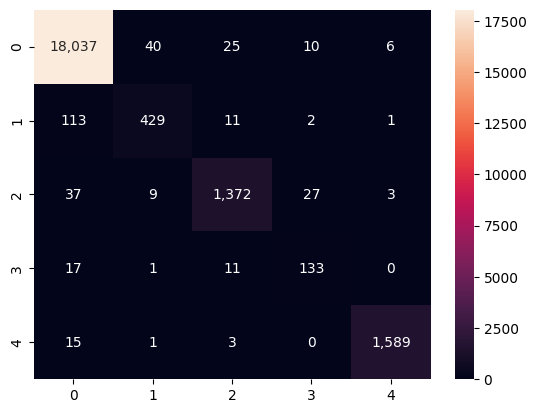

In [94]:
# Display confusion matrix as heatmap
import seaborn as sns
sns.heatmap(confusion_1, annot = True, fmt=',d')